# Regressão Logística

- É um modelo linear para **classificação** baseada na equação:

$$ y(s)=\frac{e^{s}}{{1+e^{s}}}$$

- Na regressão logística, ao invés de determinar um valor binário(0, 1) ele retorna um probabilidade de um evento ocorrer.
    - Por calcular as probabilidades de um evento, o modelo é bastante usado na classificação de credito, previsão de saída de clientes e até para prever a probabilidade de doenças.

In [1]:
# Realizando as importações necessárias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
# Carregando os dados como dataset

x, y = load_iris(return_X_y=True, as_frame=True)

In [4]:
# Considerando apenas a coluna "petal width (cm)" e os target 0 e 1
X = x.loc[y.isin([0, 1]), "petal width (cm)"].values
y = y[y.isin([0, 1])].values

In [7]:
# Preparando os conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

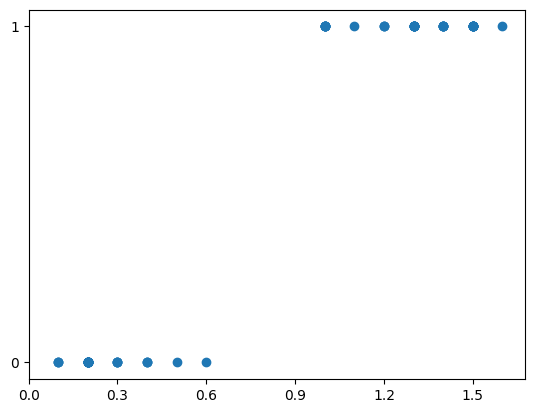

In [8]:
# Visualizando os pontos
fig, ax = plt.subplots()

ax.scatter(X_train, y_train)

ax.set(yticks=[0, 1], xticks=[0, 0.3, 0.6, 0.9, 1.2, 1.5])

plt.show()

In [10]:
# Importando o classificador
from sklearn.linear_model import LogisticRegression

# Atribuindo o classificador e realizando o treino
clf = LogisticRegression(random_state=0).fit(X_train.reshape(-1, 1), y_train)

In [11]:
# Verificando  o coeficiente angular
clf.coef_

array([[3.85103613]])

In [12]:
# Verificando o coeficiente linear
clf.intercept_

array([-2.8324819])

In [14]:
# Gerando pontos para a curva do gráfico
import numpy as np

lista_x = np.linspace(X_train.min(), X_train.max(), 100)

In [17]:
# Reelembrando que devido a regressão, a nossa expresão é
# ax = b, onde
# a = clf.coef_
# b = clf.intercept_
y_no_log = clf.coef_[0][0] * lista_x + clf.intercept_[0]

In [18]:
# Usando a função logística
from scipy.special import expit

lista_y = expit(y_no_log)

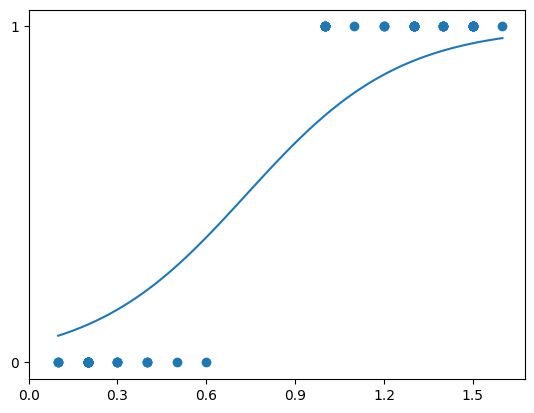

In [19]:
# Visualizando os pontos
fig, ax = plt.subplots()

ax.scatter(X_train, y_train)
ax.plot(lista_x, lista_y)

ax.set(yticks=[0, 1], xticks=[0, 0.3, 0.6, 0.9, 1.2, 1.5])

plt.show()

In [24]:
# Fazendo a previsão de probabilidades
clf.predict_proba(X_train.reshape(-1, 1))[:5]

array([[0.88718204, 0.11281796],
       [0.26530911, 0.73469089],
       [0.78449692, 0.21550308],
       [0.05001742, 0.94998258],
       [0.07182627, 0.92817373]])

In [25]:
# Verificando a previsão de probabilidades para o conjunto de treino
clf.predict_proba(X_test.reshape(-1, 1))[:5]

array([[0.03458373, 0.96541627],
       [0.10212209, 0.89787791],
       [0.01631239, 0.98368761],
       [0.84252957, 0.15747043],
       [0.78449692, 0.21550308]])

In [26]:
y_pred = clf.predict_proba(X_test.reshape(-1, 1))

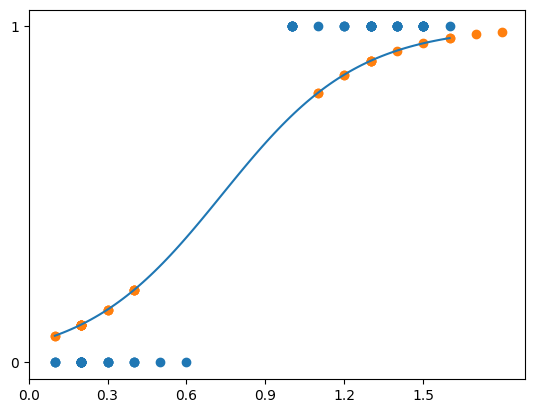

In [27]:
# Visualizando os pontos
fig, ax = plt.subplots()

ax.scatter(X_train, y_train)
ax.plot(lista_x, lista_y)
ax.scatter(X_test, y_pred[:, 1])

ax.set(yticks=[0, 1], xticks=[0, 0.3, 0.6, 0.9, 1.2, 1.5])

plt.show()

In [29]:
# Avaliando o erro do modelo
y_pred_val = clf.predict(X_test.reshape(-1, 1))

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_val)

array([[19,  0],
       [ 0, 14]], dtype=int64)

# Usando o algoritmo para todas as colunas

In [32]:
# Carregando os dados como dataset
X, y = load_iris(return_X_y=True, as_frame=True)

# Preparando os conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

# Atribuindo o classificador e realizando o treino
clf2 = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

In [36]:
# Verificando os coeficientes
clf2.coef_

array([[-0.3899349 ,  0.85590099, -2.24402166, -0.95265913],
       [ 0.43967683, -0.36126614, -0.12427755, -0.77235752],
       [-0.04974193, -0.49463485,  2.36829921,  1.72501665]])

In [37]:
# Verificando os coeficientes lineares
clf2.intercept_

array([  8.692327  ,   2.11633322, -10.80866022])

In [38]:
# Fazendo uma previsão
y_pred2 = clf2.predict(X_test)

In [41]:
# Avaliando o erro
confusion_matrix(y_test, y_pred2)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]], dtype=int64)